In [7]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [25]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

1. Возьмите датасет с цветками iris’а (функция  из библиотеки sklearn)
2. Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
3. Разделите данные на выборку для обучения и тестирования
4. Постройте модель LDA
5. Визуализируйте предсказания для тестовой выборки и центры классов (разделяющую плоскость можно не строить, но обратите внимание, что класса 3).
6. Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
7. Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [2]:
iris = load_iris()

In [18]:
#iris

In [17]:
#print(iris.DESCR)

In [154]:
# загружаем данные в датафрейм
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data_class = iris.target
# Добавляем столбец с целевой переменной:
data['target'] = iris.target

In [170]:
#Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
data = data[['sepal length (cm)', 'sepal width (cm)','target']]

In [171]:
#data.head()

In [172]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.25)

In [173]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

In [174]:
# обучаем модель
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [175]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
#result

In [176]:
# расчет точности - отношение верных прогнозов к общему количеству позиций
# является хорошей метрикой для сбалансированных классов 
# (наблюдений в категориях примерно одинаковое количество)
from sklearn.metrics import accuracy_score
print('расчет точности')
display(accuracy_score(y_test, lda.predict(X_test)))
print('коэффициенты дискриминатных линий')
display(lda.coef_)
print('посмотрим на наши центроиды')
display(lda.means_)

расчет точности


0.8157894736842105

коэффициенты дискриминатных линий


array([[-6.22227573,  7.92847608,  0.        ],
       [ 2.18201814, -4.19520672,  0.        ],
       [ 4.63441312, -4.28227956,  0.        ]])

посмотрим на наши центроиды


array([[5.00512821, 3.44871795, 0.        ],
       [5.89487179, 2.75641026, 1.        ],
       [6.50882353, 2.99705882, 2.        ]])

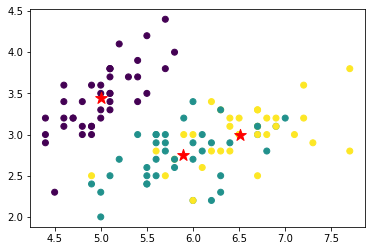

In [177]:
# визуализируем дискриминантную линию только по 2 признакам
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c=y_train)
# центроиды
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')
plt.show()

In [178]:
from sklearn.cluster import KMeans

In [179]:
# fit-transform сразу обучается и преобразует данные
X_scaled = scaler.fit_transform(data)

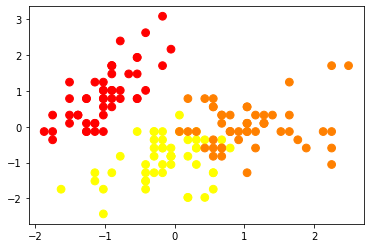

In [180]:
# явно указываем количество кластеров
kmeans = KMeans(n_clusters=3)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(X_scaled)
#clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=60)

In [181]:
# строим график локтя

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

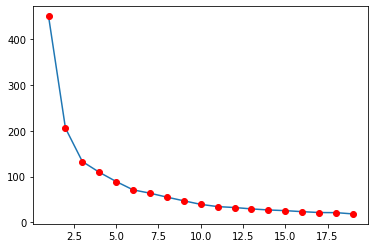

In [182]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

In [183]:
# получилось 2

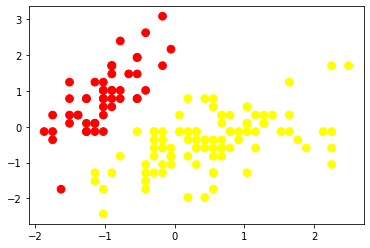

In [184]:
# явно указываем количество кластеров
kmeans = KMeans(n_clusters=2)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(X_scaled)
#clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=60)

In [185]:
# на основании только двух параметров получается оптимально 2 (два) класса

In [186]:
#с помощью переменных «sepal width (cm)» и «sepal length (cm)» качественную классификацию не построить, 
#   т.к. точки двух классов перемешаны между собой.

small_train = X_train[(y_train == 0) | (y_train == 2)]
small_train = small_train[['sepal length (cm)', 'sepal width (cm)']]
sy_train = y_train[(y_train == 0) | (y_train == 2)]
small_test = X_test[(y_test == 0) | (y_test == 2)]
small_test = small_test[['sepal length (cm)', 'sepal width (cm)']]
sy_test = y_test[(y_test == 0) | (y_test == 2)]

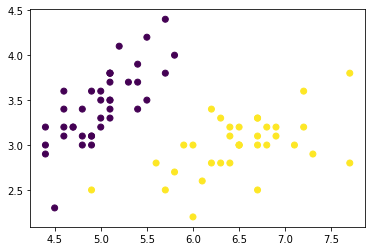

In [187]:
plt.scatter(small_train['sepal length (cm)'], small_train['sepal width (cm)'], c=sy_train)
plt.show()

In [188]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, sy_train)

LinearDiscriminantAnalysis()

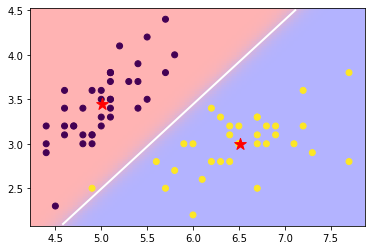

In [189]:
# сам scatter plot
plt.scatter(small_train['sepal length (cm)'], small_train['sepal width (cm)'], c=sy_train)
# центроиды
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx), np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda_small.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes', norm=colors.Normalize(0., 1.), zorder=-1, shading='auto')

# отделяем друг от друга
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

In [190]:
# какая будет точность?
accuracy_score(sy_test, lda_small.predict(small_test))

1.0

In [191]:
from scipy.spatial.distance import pdist

In [192]:
from scipy.cluster.hierarchy import dendrogram, linkage

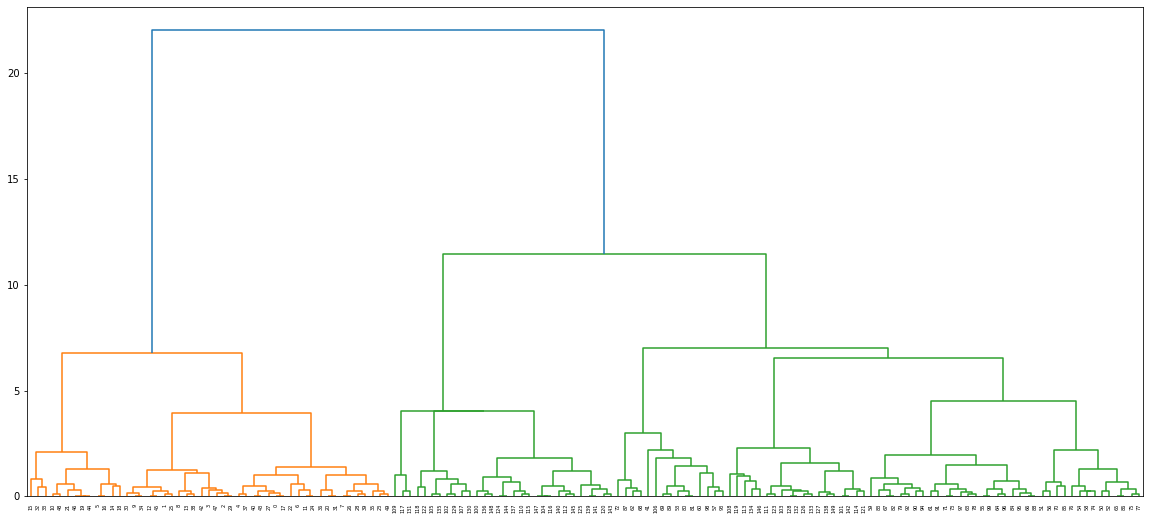

In [193]:
# строим дендрограмму
distance_mat = pdist(X_scaled) # pdist посчитает нам матрицу попарных расстояний между точками
Z = linkage(distance_mat, 'ward')
plt.figure(figsize=(20, 9))
dn = dendrogram(Z)